<a href="https://colab.research.google.com/github/sumanjitmoshat/ClassicalML/blob/master/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages and libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
warnings.filterwarnings("ignore") 

In [ ]:
# connecting with kaggle to download the dataset 
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mlg-ulb/creditcardfraud
! mkdir creditcardfrauddataset
! unzip creditcardfraud.zip -d creditcardfrauddataset

^C


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
cd creditcardfrauddataset/

/content/creditcardfrauddataset/creditcardfrauddataset


In [ ]:
creditcardfraud = pd.read_csv('creditcard.csv')

## EDA and Pre-Processing

In [ ]:
creditcardfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcardfraud.shape

(284807, 31)

In [ ]:
creditcardfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Transforming the time column to extract time taken by each transaction

In [ ]:
creditcardfraud.Time = creditcardfraud.Time.diff().fillna(creditcardfraud.Time)

In [ ]:
creditcardfraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.606699,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.053380,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,32.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


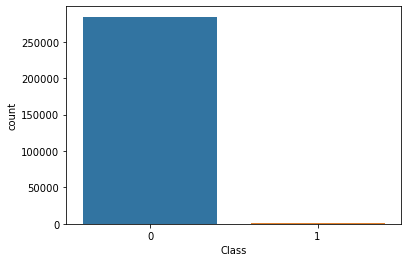

In [ ]:
sns.countplot(x='Class',data=creditcardfraud)
plt.show()

## From the above plot it's clear that the dataset is imbalanced

## Creating X and y(target) from the dataset

In [ ]:
X = creditcardfraud.drop(columns='Class')
y = creditcardfraud.Class

### splitting the dataset into train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## initializing SMOTE to make the dataset balanced

In [ ]:
SMOTE = SMOTE()

### Creating balanced train data from the dataset

In [ ]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

### Creating a dataframe from the SMOTE numpy arrays for processing

In [ ]:
X_train_SMOTE = pd.DataFrame(X_train_SMOTE, columns=X_train.columns)

In [ ]:
### initializing a logistic regression model and rfe for selecting top 15 features

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_SMOTE, y_train_SMOTE)

In [ ]:
list(zip(X_train_SMOTE.columns, rfe.support_, rfe.ranking_))

[('Time', False, 6),
 ('V1', False, 2),
 ('V2', False, 11),
 ('V3', False, 5),
 ('V4', True, 1),
 ('V5', False, 7),
 ('V6', True, 1),
 ('V7', False, 15),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 14),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', True, 1),
 ('V19', False, 3),
 ('V20', False, 12),
 ('V21', False, 13),
 ('V22', False, 8),
 ('V23', False, 4),
 ('V24', False, 10),
 ('V25', True, 1),
 ('V26', False, 9),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', False, 16)]

In [ ]:
col = X_train_SMOTE.columns[rfe.support_]

In [ ]:
X_train_SMOTE.columns[~rfe.support_]

Index(['Time', 'V1', 'V2', 'V3', 'V5', 'V7', 'V15', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V26', 'Amount'],
      dtype='object')

# Defining several methods to be reused

In [ ]:
# defining a method to generate a logistic model
def get_logistic_model(X_train , columns , y_train):
  X_train_sm = sm.add_constant(X_train[col])
  logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logreg.fit()
  return res,X_train_sm

In [ ]:
# defining a method to generate the prediction dataset
def get_prediction_dataset(res,X_train_sm,y_train_SMOTE,cutoff):
  y_train_pred = res.predict(X_train_sm)
  y_train_pred = y_train_pred.values.reshape(-1)
  y_train_pred_final = pd.DataFrame({'Fraud':y_train_SMOTE, 'Fraud_Prob':y_train_pred})
  y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > cutoff else 0)
  return y_train_pred_final

In [ ]:
# defining a method to genenate the confusion matrix
def get_confusion_matrix(predictionmatrix):
  confusion = metrics.confusion_matrix(predictionmatrix.Fraud, predictionmatrix.predicted )
  return confusion

In [ ]:
# defininf a method to get accuracy
def get_accuracy(y_train_pred_final):
  accuracy = metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted)
  return accuracy

In [ ]:
# defining a method for getting VIF
def get_vif(X_train,columns):
  vif = pd.DataFrame()
  vif['Features'] = X_train_SMOTE[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [ ]:
# defining a method to generate roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# method which prints all the measures from a confusion matrix
def get_all_measures(confusion):
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  sensitivity = TP / float(TP+FN)
  specificity = TN / float(TN+FP)
  false_positive_rate = FP/ float(TN+FP)
  positive_predictive_value = TP / float(TP+FP)
  negative_predictive_value = TN / float(TN+ FN)
  precision = TP/(FP+TP)
  recall = TP/(FN+TP)
  print('Sensitivity is : ' + '{0:.2f}'.format(sensitivity) + '\n')
  print('specificity is : ' + '{0:.2f}'.format(specificity) + '\n')
  print('false_positive_rate is : ' + '{0:.2f}'.format(false_positive_rate) + '\n')
  print('negative_predictive_value is : ' + '{0:.2f}'.format(negative_predictive_value) + '\n')
  print('precision is : ' + '{0:.2f}'.format(precision) + '\n')
  print('recall is : ' + '{0:.2f}'.format(recall) + '\n')

In [ ]:
# creating a logistic regression with top 15 features that we got from RFE
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398014
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        21:40:09   Pearson chi2:                 9.60e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7739      0.016   -238.841      0.000      -3.805      -3.743
V4             0.8693      0.008    112.038      0.000       0.854       0.885
V6            -0.2703      0.008    -32.461      0.000      -0.287      -0.254
V8            -0.4313      0.007    -61.834      0.000      -0.445      -0.418
V9            -0.3979      0.011    -36.250      0.000      -0.419      -0.376
V10           -0.5749      0.012    -47.302      0.000      -0.599      -0.551
V11            0.5102      0.011     46.487      0.000       0.489       0.532
V12           -0.8566      0.013    -67.312      0.000      -0.882      -0.832
V13           -0.2993      0.010    -28.761      0.000      -0.320      -0.279
V14           -1.3536      0.013   -107.264      0.000      -1.378      -1.329
V16           -0.6128      0.014    -43.698      0.000      -0.640      -0.585
V17           -0.5139      0.016    -31.770      0.000      -0.546      -0.482
V18           -0.4409      0.014    -30.753      0.000      -0.469      -0.413
V25            0.4616      0.019     24.250      0.000       0.424       0.499
V27            0.3897      0.025     15.541      0.000       0.341       0.439
V28            0.4971      0.031     16.088      0.000       0.437       0.558
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)

### creating the confusion matrix

In [ ]:
y_train_pred

,Fraud,Fraud_Porb,predicted
0,0,0.036563,0
1,0,0.004460,0
2,0,0.003769,0
3,0,0.039157,0
4,0,0.003465,0
...,...,...,...
398025,1,1.000000,1
398026,1,1.000000,1
398027,1,1.000000,1
398028,1,1.000000,1


In [ ]:
confusion = get_confusion_matrix(y_train_pred)
print(confusion)

[[196126   2889]
 [ 11621 187394]]


In [ ]:
print(get_accuracy(y_train_pred))

0.9635454613973821


In [ ]:
get_vif(X_train_SMOTE,col)

   Features    VIF
10      V17  27.27
6       V12  24.48
9       V16  23.26
4       V10  14.81
8       V14  13.79
11      V18  12.90
5       V11  12.53
0        V4   7.79
3        V9   6.56
1        V6   2.67
2        V8   2.17
13      V27   1.90
14      V28   1.33
12      V25   1.23
7       V13   1.15


### dropping the column V12 from the dataset as it has very high VIF value

In [ ]:
col = col.drop('V17', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V18',
       'V25', 'V27', 'V28'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398015
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        21:41:51   Pearson chi2:                 5.60e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7585      0.016   -239.965      0.000      -3.789      -3.728
V4             0.8052      0.007    113.520      0.000       0.791       0.819
V6            -0.2238      0.008    -28.256      0.000      -0.239      -0.208
V8            -0.3773      0.007    -56.793      0.000      -0.390      -0.364
V9            -0.3893      0.011    -36.975      0.000      -0.410      -0.369
V10           -0.4168      0.010    -40.628      0.000      -0.437      -0.397
V11            0.3897      0.010     39.378      0.000       0.370       0.409
V12           -0.7092      0.011    -65.898      0.000      -0.730      -0.688
V13           -0.2864      0.010    -27.789      0.000      -0.307      -0.266
V14           -1.1543      0.010   -117.310      0.000      -1.174      -1.135
V16           -0.5121      0.012    -41.832      0.000      -0.536      -0.488
V18           -0.4206      0.013    -31.600      0.000      -0.447      -0.395
V25            0.4818      0.019     25.425      0.000       0.445       0.519
V27            0.2352      0.024      9.849      0.000       0.188       0.282
V28            0.2921      0.027     10.705      0.000       0.239       0.346
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.040772,0
1,0,0.005822,0
2,0,0.004621,0
3,0,0.040330,0
4,0,0.003980,0


In [ ]:
print(get_accuracy(y_train_pred))

0.9619375423963018


In [ ]:
get_vif(X_train_SMOTE,col)

   Features    VIF
6       V12  24.04
9       V16  17.51
4       V10  14.65
8       V14  13.75
5       V11  12.53
10      V18   9.21
0        V4   7.73
3        V9   6.46
1        V6   2.66
2        V8   2.07
12      V27   1.90
13      V28   1.33
11      V25   1.23
7       V13   1.15


In [ ]:
col = col.drop('V12', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V16', 'V18', 'V25',
       'V27', 'V28'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398016
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        21:43:03   Pearson chi2:                 2.00e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7813      0.016   -241.244      0.000      -3.812      -3.751
V4             0.8765      0.007    120.098      0.000       0.862       0.891
V6            -0.2398      0.008    -30.517      0.000      -0.255      -0.224
V8            -0.3816      0.006    -60.678      0.000      -0.394      -0.369
V9            -0.3755      0.011    -34.531      0.000      -0.397      -0.354
V10           -0.4388      0.010    -42.990      0.000      -0.459      -0.419
V11            0.3225      0.010     33.727      0.000       0.304       0.341
V13           -0.3318      0.011    -30.754      0.000      -0.353      -0.311
V14           -1.2291      0.010   -120.621      0.000      -1.249      -1.209
V16           -0.4541      0.012    -38.905      0.000      -0.477      -0.431
V18           -0.3352      0.013    -26.009      0.000      -0.361      -0.310
V25            0.4271      0.018     23.359      0.000       0.391       0.463
V27            0.0615      0.023      2.651      0.008       0.016       0.107
V28            0.1812      0.026      6.873      0.000       0.129       0.233
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.033092,0
1,0,0.002972,0
2,0,0.002702,0
3,0,0.021662,0
4,0,0.003107,0


In [ ]:
print(get_accuracy(y_train_pred))

0.9581915935984725


In [ ]:
get_vif(X_train_SMOTE,col)

   Features    VIF
8       V16  16.29
4       V10  13.93
7       V14  12.26
5       V11  11.22
9       V18   9.15
0        V4   7.46
3        V9   6.46
1        V6   2.65
2        V8   2.06
11      V27   1.87
12      V28   1.33
10      V25   1.21
6       V13   1.14


In [ ]:
col = col.drop('V16', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V18', 'V25', 'V27',
       'V28'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398017
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        21:44:06   Pearson chi2:                 5.95e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7817      0.016   -241.633      0.000      -3.812      -3.751
V4             0.8874      0.007    121.620      0.000       0.873       0.902
V6            -0.2179      0.008    -28.033      0.000      -0.233      -0.203
V8            -0.3601      0.006    -58.096      0.000      -0.372      -0.348
V9            -0.3444      0.011    -31.502      0.000      -0.366      -0.323
V10           -0.4921      0.010    -47.557      0.000      -0.512      -0.472
V11            0.3091      0.009     32.770      0.000       0.291       0.328
V13           -0.3537      0.011    -32.896      0.000      -0.375      -0.333
V14           -1.2283      0.010   -122.381      0.000      -1.248      -1.209
V18           -0.4819      0.012    -38.610      0.000      -0.506      -0.457
V25            0.3558      0.018     19.692      0.000       0.320       0.391
V27            0.0006      0.023      0.027      0.979      -0.045       0.046
V28            0.1892      0.027      6.893      0.000       0.135       0.243
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.034724,0
1,0,0.002357,0
2,0,0.002558,0
3,0,0.020186,0
4,0,0.003364,0


In [ ]:
print(get_accuracy(y_train_pred))

0.9571791071024797


In [ ]:
get_vif(X_train_SMOTE,col)

   Features    VIF
4       V10  13.16
7       V14  11.34
5       V11  11.01
0        V4   7.43
3        V9   6.40
8       V18   3.98
1        V6   2.65
2        V8   2.06
10      V27   1.86
11      V28   1.31
9       V25   1.18
6       V13   1.14


In [ ]:
col = col.drop('V10', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V11', 'V13', 'V14', 'V18', 'V25', 'V27',
       'V28'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398018
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        21:45:21   Pearson chi2:                 3.86e+12
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7575      0.015   -247.577      0.000      -3.787      -3.728
V4             0.7859      0.006    123.242      0.000       0.773       0.798
V6            -0.2283      0.008    -29.200      0.000      -0.244      -0.213
V8            -0.3734      0.006    -61.393      0.000      -0.385      -0.361
V9            -0.4276      0.010    -43.537      0.000      -0.447      -0.408
V11            0.3164      0.009     34.420      0.000       0.298       0.334
V13           -0.3834      0.011    -36.061      0.000      -0.404      -0.363
V14           -1.4078      0.009   -153.326      0.000      -1.426      -1.390
V18           -0.4274      0.012    -37.008      0.000      -0.450      -0.405
V25            0.4674      0.018     26.424      0.000       0.433       0.502
V27            0.3027      0.021     14.724      0.000       0.262       0.343
V28            0.3287      0.026     12.432      0.000       0.277       0.380
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.026625,0
1,0,0.007868,0
2,0,0.007432,0
3,0,0.016862,0
4,0,0.003334,0


In [ ]:
print(get_accuracy(y_train_pred))

0.9556440469311358


In [ ]:
get_vif(X_train_SMOTE,col)

   Features    VIF
6       V14  11.20
4       V11  10.06
0        V4   7.34
3        V9   5.22
7       V18   3.10
1        V6   2.61
2        V8   1.97
9       V27   1.64
10      V28   1.28
8       V25   1.17
5       V13   1.14


In [ ]:
col = col.drop('V14', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V11', 'V13', 'V18', 'V25', 'V27', 'V28'], dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398019
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70140.
Date:                Tue, 14 Sep 2021   Deviance:                   1.4028e+05
Time:                        21:45:54   Pearson chi2:                 4.28e+11
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3604      0.013   -264.113      0.000      -3.385      -3.336
V4             1.0596      0.006    188.208      0.000       1.049       1.071
V6            -0.5659      0.008    -74.559      0.000      -0.581      -0.551
V8            -0.4373      0.006    -77.112      0.000      -0.448      -0.426
V9            -0.3169      0.008    -40.049      0.000      -0.332      -0.301
V11            1.1122      0.007    167.402      0.000       1.099       1.125
V13           -0.3040      0.008    -40.179      0.000      -0.319      -0.289
V18           -0.3452      0.008    -45.897      0.000      -0.360      -0.330
V25            0.5831      0.014     40.401      0.000       0.555       0.611
V27            0.2077      0.017     12.168      0.000       0.174       0.241
V28            0.4601      0.024     18.999      0.000       0.413       0.508
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.045622,0
1,0,0.004221,0
2,0,0.005331,0
3,0,0.025653,0
4,0,0.002703,0


In [ ]:
print(get_accuracy(y_train_pred))

0.935761123533402


In [ ]:
get_vif(X_train_SMOTE,col)

  Features   VIF
4      V11  6.48
0       V4  6.41
3       V9  5.21
6      V18  3.10
1       V6  2.50
2       V8  1.95
8      V27  1.56
9      V28  1.18
7      V25  1.17
5      V13  1.13


In [ ]:
col = col.drop('V11', 1)
col

Index(['V4', 'V6', 'V8', 'V9', 'V13', 'V18', 'V25', 'V27', 'V28'], dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398020
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90084.
Date:                Tue, 14 Sep 2021   Deviance:                   1.8017e+05
Time:                        21:46:23   Pearson chi2:                 1.99e+14
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8820      0.011   -268.350      0.000      -2.903      -2.861
V4             1.1900      0.005    234.434      0.000       1.180       1.200
V6            -0.7625      0.007   -112.935      0.000      -0.776      -0.749
V8            -0.4366      0.005    -86.706      0.000      -0.446      -0.427
V9            -0.4707      0.007    -65.332      0.000      -0.485      -0.457
V13           -0.3266      0.007    -49.070      0.000      -0.340      -0.314
V18           -0.5972      0.006    -97.558      0.000      -0.609      -0.585
V25            0.5067      0.012     41.181      0.000       0.483       0.531
V27            0.3450      0.014     25.131      0.000       0.318       0.372
V28            0.7696      0.022     35.112      0.000       0.727       0.813
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.073468,0
1,0,0.005503,0
2,0,0.004824,0
3,0,0.189885,0
4,0,0.003127,0


In [ ]:
print(get_accuracy(y_train_pred))

0.9110167575308394


In [ ]:
get_vif(X_train_SMOTE,col)

  Features   VIF
3       V9  5.11
0       V4  4.58
5      V18  2.78
1       V6  2.37
2       V8  1.90
7      V27  1.33
6      V25  1.17
8      V28  1.16
4      V13  1.13


In [ ]:
col = col.drop('V9', 1)
col

Index(['V4', 'V6', 'V8', 'V13', 'V18', 'V25', 'V27', 'V28'], dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398030
Model:                            GLM   Df Residuals:                   398021
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          inf
Time:                        21:47:46   Pearson chi2:                 5.17e+15
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9205      0.011   -271.661      0.000      -2.942      -2.899
V4             1.2899      0.005    259.880      0.000       1.280       1.300
V6            -0.8036      0.007   -120.813      0.000      -0.817      -0.791
V8            -0.3959      0.005    -82.835      0.000      -0.405      -0.387
V13           -0.3360      0.006    -52.193      0.000      -0.349      -0.323
V18           -0.7079      0.006   -121.244      0.000      -0.719      -0.696
V25            0.5495      0.012     45.047      0.000       0.526       0.573
V27            0.5249      0.013     39.641      0.000       0.499       0.551
V28            0.8121      0.022     37.241      0.000       0.769       0.855
==============================================================================
"""

In [ ]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Prob,predicted
0,0,0.067563,0
1,0,0.002364,0
2,0,0.002041,0
3,0,0.196895,0
4,0,0.001695,0


In [ ]:
get_vif(X_train_SMOTE,col)

  Features   VIF
0       V4  2.78
1       V6  2.34
4      V18  2.27
2       V8  1.89
6      V27  1.26
5      V25  1.16
7      V28  1.14
3      V13  1.13


In [ ]:
print(get_accuracy(y_train_pred))

0.9079014144662463


In [ ]:
# Let's take a look at the confusion matrix again 
confusion = get_confusion_matrix(y_train_pred)
confusion

array([[185191,  13824],
       [ 22834, 176181]])

In [ ]:
get_all_measures(confusion)

Sensitivity is : 0.89

specificity is : 0.93

false_positive_rate is : 0.07

negative_predictive_value is : 0.89

precision is : 0.93

recall is : 0.89



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred.Fraud, y_train_pred.Fraud_Prob, drop_intermediate = False )

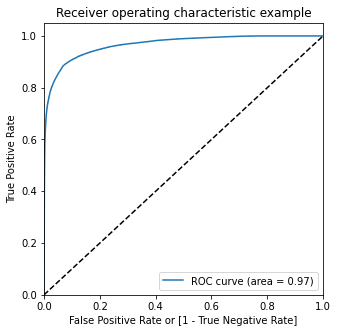

In [ ]:
draw_roc(y_train_pred.Fraud, y_train_pred.Fraud_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Fraud,Fraud_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067563,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002364,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002041,0,1,0,0,0,0,0,0,0,0,0
3,0,0.196895,0,1,1,0,0,0,0,0,0,0,0
4,0,0.001695,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Fraud, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.798420  0.979489  0.617350
0.2   0.2  0.863370  0.956451  0.770289
0.3   0.3  0.891340  0.931920  0.850760
0.4   0.4  0.903764  0.908374  0.899153
0.5   0.5  0.907901  0.885265  0.930538
0.6   0.6  0.901033  0.850634  0.951431
0.7   0.7  0.891905  0.816612  0.967198
0.8   0.8  0.878645  0.777715  0.979574
0.9   0.9  0.852581  0.715062  0.990101


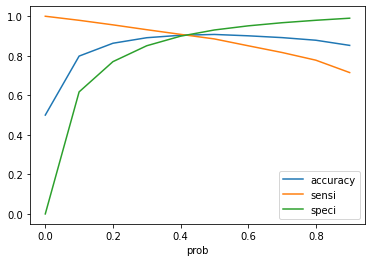

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred['final_predicted'] = y_train_pred.Fraud_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred.head()

,Fraud,Fraud_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067563,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002364,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002041,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.196895,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.001695,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred.Fraud, y_train_pred.final_predicted))

0.9037635354119036


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred.Fraud, y_train_pred.final_predicted )
confusion2

array([[178945,  20070],
       [ 18235, 180780]])

In [ ]:
get_all_measures(confusion2)

Sensitivity is : 0.91

specificity is : 0.90

false_positive_rate is : 0.10

negative_predictive_value is : 0.91

precision is : 0.90

recall is : 0.91



In [ ]:
X_test = X_test[col]
X_test.head()

,V4,V6,V8,V13,V18,V25,V27,V28
69469,-0.604220,3.220823,0.765428,0.021785,-0.082656,0.436351,-0.049085,0.013198
190234,0.533765,-1.447242,-0.354569,-0.302472,0.447603,0.227029,-0.001726,-0.031748
175551,0.306401,0.183886,0.226719,-0.384204,0.682198,-0.141367,0.033374,-0.040584
149595,-0.197500,0.097873,-11.169795,1.436761,-0.529008,-0.196056,0.045830,0.503654
77646,-0.094733,-1.010269,-0.189717,1.321746,1.533399,0.198068,-0.012535,0.064118


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final_test.head()

,Class,0
69469,0,0.001805
190234,0,0.260024
175551,0,0.038802
149595,0,0.799779
77646,0,0.028440


In [ ]:
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 0 : 'Fraud_Prob'})

In [ ]:
y_pred_final_test['final_predicted'] = y_pred_final_test.Fraud_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_pred_final_test.head()

,Class,Fraud_Prob,final_predicted
69469,0,0.001805,0
190234,0,0.260024,0
175551,0,0.038802,0
149595,0,0.799779,1
77646,0,0.028440,0


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final_test.Class, y_pred_final_test.final_predicted))

0.9007876596093302


In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final_test.Class, y_pred_final_test.final_predicted )
confusion2

array([[76841,  8459],
       [   18,   125]])

In [ ]:
get_all_measures(confusion2)

Sensitivity is : 0.87

specificity is : 0.90

false_positive_rate is : 0.10

negative_predictive_value is : 1.00

precision is : 0.01

recall is : 0.87



# The precision in test data is very low. There are lots of false positives. 

## Support Vector Machine

In [ ]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9994499256814484 



In [ ]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[85280    19]
 [   28   116]]


In [ ]:
confusion_svm_linear = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_svm_linear)

Sensitivity is : 0.81

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.86

recall is : 0.81



In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.999403110845827 



In [ ]:
confusion_svm_non_linear = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_svm_non_linear)

Sensitivity is : 0.69

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.94

recall is : 0.69



### Linear SVM model is performing better than the Non Linear SVM Model. We will proceed with the hyperparameter tuning of the linear model

# Decision Tree

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

In [ ]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt_default.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9994616293903538 



In [ ]:
confusion_decision_tree_default = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_decision_tree_default)

Sensitivity is : 0.82

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.88

recall is : 0.82



## Hyperparameter Tuning

### There are total 4 hyperparameters that we are gonna tune for decision tree . A short description is given below for each of them



*   max depth - the maximum depth of the tree

*   criterion - there are two values here. 
  1.   gini -measure of impurity
  2.   entropy - measure of randomness

*   min_samples_leaf - the minimum samples required to be at a leaf node
*   min_samples_split - the minimum samples required to split an     internal node











### Tuning criterion

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_di

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.869686,0.483726,0.009354,0.000108,entropy,{'criterion': 'entropy'},0.999248,0.999172,0.999147,0.999197,0.999172,0.999187,0.000034,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,12.582323,1.591743,0.010840,0.000967,gini,{'criterion': 'gini'},0.998972,0.999172,0.998972,0.999223,0.999022,0.999072,0.000105,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


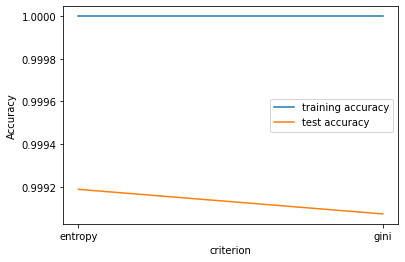

In [ ]:
# plotting accuracies with param_criterion
plt.figure()
plt.plot(scores["param_criterion"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_criterion"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("criterion")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### it's clear from the plot that entropy is the better criterion

## Tuning max_depth

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs'

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.504881,0.326183,0.009316,0.002733,1,{'max_depth': 1},0.998320,0.999122,0.999022,0.998320,0.998320,0.998621,0.000370,39,0.998320,0.999016,0.999041,0.998320,0.998320,0.998603,0.000347
1,2.470316,0.012188,0.008480,0.000920,2,{'max_depth': 2},0.999323,0.999248,0.999147,0.999147,0.999147,0.999202,0.000072,22,0.999354,0.999191,0.999204,0.999392,0.999398,0.999308,0.000091
2,3.651599,0.010018,0.008221,0.000127,3,{'max_depth': 3},0.999423,0.999473,0.999323,0.999248,0.999323,0.999358,0.000080,4,0.999498,0.999335,0.999354,0.999536,0.999455,0.999436,0.000079
3,4.833299,0.029654,0.008525,0.000081,4,{'max_depth': 4},0.999423,0.999473,0.999273,0.999248,0.999298,0.999343,0.000089,6,0.999511,0.999517,0.999530,0.999542,0.999498,0.999520,0.000015
4,6.120603,0.269900,0.008678,0.000049,5,{'max_depth': 5},0.999423,0.999398,0.999273,0.999423,0.999498,0.999403,0.000073,2,0.999605,0.999624,0.999580,0.999636,0.999630,0.999615,0.000020


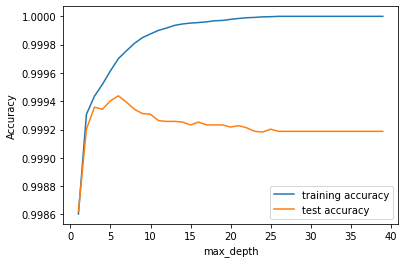

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### it can be seen from the above plot that the optimal max_depth is 5

## Tuning min_samples_leaf

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy",
                               max_depth = 5,
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=100,
           

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.992903,0.095234,0.008744,0.000066,5,{'min_samples_leaf': 5},0.999398,0.999298,0.999298,0.999398,0.999448,0.999368,0.000060,1,0.999561,0.999580,0.999555,0.999599,0.999580,0.999575,0.000016
1,5.941923,0.019934,0.008716,0.000081,25,{'min_samples_leaf': 25},0.999398,0.999473,0.999273,0.999147,0.999147,0.999288,0.000131,2,0.999448,0.999473,0.999461,0.999411,0.999436,0.999446,0.000022
2,6.048412,0.288761,0.009136,0.000675,45,{'min_samples_leaf': 45},0.999323,0.999348,0.999373,0.999147,0.999147,0.999268,0.000100,3,0.999354,0.999273,0.999342,0.999392,0.999398,0.999352,0.000045
3,5.915336,0.021094,0.008836,0.000325,65,{'min_samples_leaf': 65},0.999323,0.998972,0.998972,0.999147,0.999147,0.999112,0.000131,9,0.999354,0.999147,0.999141,0.999392,0.999398,0.999286,0.000117
4,5.937260,0.025820,0.008773,0.000096,85,{'min_samples_leaf': 85},0.999323,0.998972,0.998796,0.999147,0.999147,0.999077,0.000179,10,0.999354,0.999091,0.999091,0.999392,0.999398,0.999265,0.000143


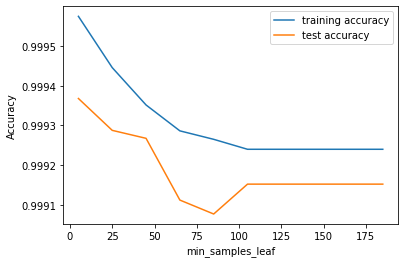

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### It's clear from the above plot that the optimal value for min_samples_leaf is 5

## Tuning min_samples_split

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy", 
                               max_depth=5,
                               min_samples_leaf=5,
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.492100,1.089630,0.008635,0.000066,5,{'min_samples_split': 5},0.999398,0.999298,0.999298,0.999398,0.999448,0.999368,0.000060,2,0.999561,0.999580,0.999555,0.999599,0.999580,0.999575,0.000016
1,6.049397,0.099218,0.008746,0.000023,25,{'min_samples_split': 25},0.999423,0.999448,0.999273,0.999448,0.999448,0.999408,0.000068,1,0.999536,0.999517,0.999542,0.999567,0.999580,0.999549,0.000022
2,6.169142,0.023738,0.008810,0.000129,45,{'min_samples_split': 45},0.999398,0.999448,0.999273,0.999373,0.999248,0.999348,0.000076,4,0.999455,0.999467,0.999530,0.999505,0.999461,0.999483,0.000029
3,6.027728,0.089629,0.009275,0.001275,65,{'min_samples_split': 65},0.999398,0.999448,0.999273,0.999373,0.999248,0.999348,0.000076,4,0.999455,0.999467,0.999480,0.999505,0.999461,0.999473,0.000018
4,5.984838,0.038655,0.008655,0.000076,85,{'min_samples_split': 85},0.999398,0.999498,0.999323,0.999373,0.999248,0.999368,0.000083,3,0.999455,0.999335,0.999373,0.999505,0.999461,0.999426,0.000062


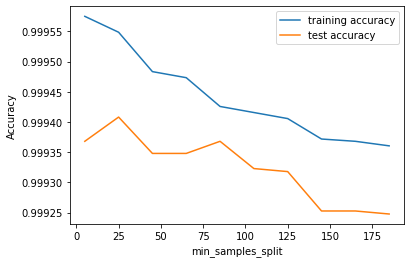

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### It's clear from the above plot that the optimal value for min_samples_split is 25

In [ ]:
# model with optimal hyperparameters
final_decision_tree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=5,
                                  min_samples_split=25)
final_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred = final_decision_tree.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9994265182636377 



In [ ]:
confusion_decision_tree_final = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_decision_tree_final)

Sensitivity is : 0.78

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.90

recall is : 0.78



# Random Forest

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9995669627705019 



In [ ]:
confusion_random_forest_default = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_random_forest_default)

Sensitivity is : 0.80

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.93

recall is : 0.80



## Hyperparameter Tuning

*   max depth - the maximum depth of the tree

*   criterion - there are two values here. 
  1.   gini -measure of impurity
  2.   entropy - measure of randomness

*   min_samples_leaf - the minimum samples required to be at a leaf node
*   min_samples_split - the minimum samples required to split an     internal node
*   n_estimators = total number of trees
*   max_features = maximum number of features taken into consideration at each node while splitting

### Tuning Criterion

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'criterion': ['entropy','gini']}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,115.171671,1.248979,0.341928,0.043568,entropy,{'criterion': 'entropy'},0.999398,0.999599,0.999549,0.999523,0.999574,0.999529,0.000070,1,0.999987,0.999994,1.0,1.0,1.0,0.999996,0.000005
1,155.636158,5.518735,0.408826,0.005245,gini,{'criterion': 'gini'},0.999423,0.999574,0.999498,0.999523,0.999549,0.999513,0.000052,2,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000


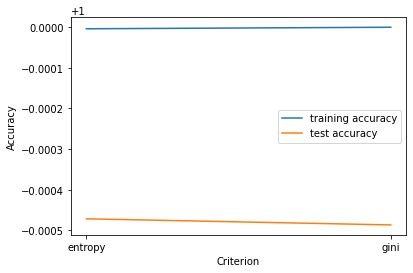

In [ ]:
# plotting accuracies with criterion
plt.figure()
plt.plot(scores["param_criterion"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_criterion"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### We can conclude from the above plot than entropy would be the right choice for criterion

### Tuning max_depth

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion="entropy")


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.732786,0.131150,0.191110,0.006235,2,{'max_depth': 2},0.999047,0.999022,0.999147,0.998922,0.999022,0.999032,0.000072,4,0.999034,0.998997,0.999078,0.999085,0.999028,0.999044,0.000033
1,85.975920,0.550968,0.280273,0.004551,7,{'max_depth': 7},0.999423,0.999549,0.999624,0.999473,0.999574,0.999529,0.000072,3,0.999712,0.999705,0.999680,0.999718,0.999674,0.999698,0.000017
2,103.975397,3.024720,0.318652,0.002787,12,{'max_depth': 12},0.999448,0.999574,0.999624,0.999523,0.999624,0.999559,0.000067,1,0.999862,0.999806,0.999812,0.999856,0.999843,0.999836,0.000023
3,103.909064,2.379814,0.318111,0.005190,17,{'max_depth': 17},0.999423,0.999599,0.999574,0.999523,0.999624,0.999549,0.000071,2,1.000000,1.000000,0.999994,1.000000,1.000000,0.999999,0.000003


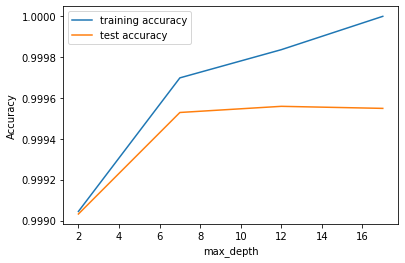

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### we can conclude from the above plot that 7 is the optimal value for max_depth

## Tuning n_estimators

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7,criterion="entropy",n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=7,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,73.996094,1.064146,0.311781,0.000798,100,{'n_estimators': 100},0.999423,0.999549,0.999599,0.999448,0.999523,0.999508,0.000065,3,0.999724,0.999705,0.999693,0.999712,0.999649,0.999697,0.000026
1,366.704759,0.435105,1.212628,0.000156,500,{'n_estimators': 500},0.999398,0.999574,0.999599,0.999448,0.999523,0.999508,0.000075,3,0.999718,0.999705,0.999693,0.999718,0.999661,0.999699,0.000021
2,614.211095,27.929009,1.953927,0.081383,900,{'n_estimators': 900},0.999423,0.999574,0.999599,0.999423,0.999549,0.999513,0.000075,2,0.999712,0.999705,0.999680,0.999718,0.999661,0.999695,0.000021
3,866.219468,5.074824,2.755097,0.048802,1300,{'n_estimators': 1300},0.999423,0.999574,0.999599,0.999448,0.999549,0.999518,0.000070,1,0.999712,0.999705,0.999680,0.999712,0.999674,0.999697,0.000016


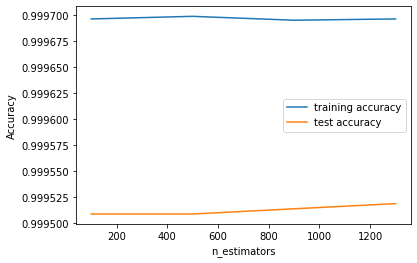

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## From the above plot it's clear that 1000 is a good number for n_estimators

### Tuning max_features

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,criterion="entropy",n_estimators=1000)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,n_jobs=-1,verbose=100)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 58.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 59.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 83.8min
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 114.9min remaining: 146.2min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed: 115.4min remaining: 125.0min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed: 116.2min remaining: 107.

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=7,
                                                    n_estimators=1000),
                   n_jobs=-1,
                   param_distributions={'max_features': [4, 8, 14, 20, 24]},
                   return_train_score=True, scoring='accuracy', verbose=100)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2049.655472,19.217474,7.819894,0.752450,4,{'max_features': 4},0.999423,0.999549,0.999549,0.999423,...,0.999493,0.000058,5,0.999705,0.999705,0.999680,0.999680,0.999655,0.999685,0.000019
1,3269.174670,296.230458,6.275266,0.798899,8,{'max_features': 8},0.999423,0.999599,0.999624,0.999523,...,0.999549,0.000071,4,0.999724,0.999718,0.999699,0.999724,0.999674,0.999708,0.000019
2,4752.865046,48.420234,5.282373,0.195419,14,{'max_features': 14},0.999448,0.999574,0.999599,0.999523,...,0.999564,0.000075,3,0.999743,0.999730,0.999718,0.999730,0.999712,0.999727,0.000011
3,6348.307579,134.219082,4.856065,0.301466,20,{'max_features': 20},0.999398,0.999599,0.999624,0.999574,...,0.999579,0.000100,1,0.999749,0.999730,0.999724,0.999724,0.999718,0.999729,0.000011
4,6334.051506,759.243760,3.033544,0.537192,24,{'max_features': 24},0.999398,0.999574,0.999624,0.999549,...,0.999574,0.000106,2,0.999749,0.999730,0.999718,0.999737,0.999724,0.999732,0.000011


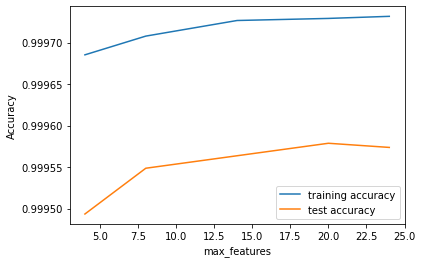

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### From the above plot it's clear that 20 would be an optimum value for max_features

### tuning min_samples_leaf

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,criterion="entropy",n_estimators=1000,max_features=20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  verbose=100)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 112.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 113.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 113.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 114.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 114.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 114.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 117.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 117.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 236.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 236.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 238.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 238.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 238.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                              max_features=20,
                                              n_estimators=1000),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=100)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6876.164133,94.560458,5.914194,0.254981,100,{'min_samples_leaf': 100},0.999273,0.999398,0.999373,0.999097,...,0.999273,0.000109,1,0.999360,0.999329,0.999317,0.999298,0.999223,0.999305,0.000046
1,7070.610926,379.682091,7.938050,3.863214,150,{'min_samples_leaf': 150},0.999223,0.999248,0.999273,0.998997,...,0.999177,0.000100,2,0.999291,0.999210,0.999223,0.999191,0.999197,0.999223,0.000036
2,7425.748736,150.494212,7.639446,0.653806,200,{'min_samples_leaf': 200},0.998270,0.999022,0.998244,0.998922,...,0.998716,0.000380,3,0.998251,0.998940,0.998257,0.999135,0.999147,0.998746,0.000409
3,9064.379245,906.346321,7.914850,0.886596,250,{'min_samples_leaf': 250},0.998270,0.998244,0.998244,0.998244,...,0.998254,0.000012,4,0.998251,0.998257,0.998257,0.998257,0.998251,0.998254,0.000003
4,8886.581354,1055.652457,7.420559,1.619836,300,{'min_samples_leaf': 300},0.998270,0.998244,0.998244,0.998244,...,0.998254,0.000012,4,0.998251,0.998257,0.998257,0.998257,0.998251,0.998254,0.000003


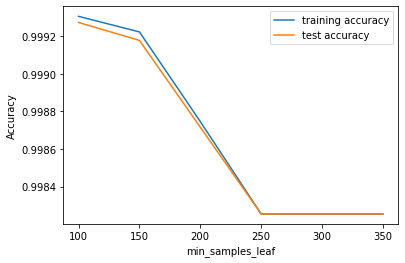

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plot it's clear that 100 is the best value for min_samples_leaf

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,criterion="entropy",n_estimators=1000,max_features=20,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  verbose=100)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 103.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 103.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 104.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 106.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 106.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 107.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 108.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 209.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 212.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 213.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 213.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 214.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                              max_features=20,
                                              min_samples_leaf=100,
                                              n_estimators=1000),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=100)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6292.296399,116.130305,5.251599,0.347407,200,{'min_samples_split': 200},0.999273,0.999398,0.999373,0.999072,...,0.999273,0.000115,1,0.999354,0.999323,0.999335,0.999279,0.999254,0.999309,0.000037
1,6376.160475,98.991850,5.499744,0.437902,250,{'min_samples_split': 250},0.999273,0.999323,0.999373,0.999047,...,0.999248,0.000112,2,0.999354,0.999310,0.999329,0.999279,0.999235,0.999302,0.000041
2,6463.180659,90.238661,5.418154,0.518738,300,{'min_samples_split': 300},0.999248,0.999323,0.999348,0.999047,...,0.999218,0.000116,3,0.999291,0.999266,0.999273,0.999216,0.999172,0.999244,0.000044
3,6321.595664,102.835335,5.496383,0.249623,350,{'min_samples_split': 350},0.999197,0.999223,0.999273,0.998997,...,0.999137,0.000117,4,0.999197,0.999135,0.999185,0.999172,0.999110,0.999160,0.000033
4,6168.101092,371.108756,6.126990,1.201932,400,{'min_samples_split': 400},0.999122,0.999147,0.999172,0.998972,...,0.999082,0.000082,6,0.999116,0.999091,0.999060,0.999166,0.999110,0.999108,0.000035


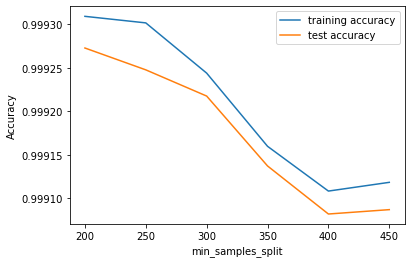

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plot it's clear that 200 would be the best value for min_samples_split

In [ ]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             criterion="entropy",
                             n_estimators=1000,
                             max_features=20,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             n_jobs=-1)

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=20,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=1000, n_jobs=-1)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9993328885923949 



In [ ]:
confusion_random_forest_final = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_random_forest_final)

Sensitivity is : 0.69

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.89

recall is : 0.69



In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.8436796591988183

# Boosting

## Adaboost

In [ ]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [ ]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=600)

In [ ]:
y_pred = adaboost_model_1.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9995669627705019 



In [ ]:
confusion_adaboost_original = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
get_all_measures(confusion_adaboost_original)

Sensitivity is : 0.80

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.93

recall is : 0.80



In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.8992586616881011

### Hyperparameter tuning for Adaboost

max_depth = maximum depeth for each tree
n_estimators = max number of estimators where boosting is terminated

In [ ]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [ ]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [ ]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=8)

In [ ]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed: 87.4min finished


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             n_jobs=8,
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,623.978846,10.801179,6.701022,0.787281,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.979599,0.978657,0.976694,0.978317,0.001210,3,0.999996,0.999965,0.999971,0.999977,0.000013
1,1265.628199,9.479903,11.179852,0.473491,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.980490,0.980160,0.977941,0.979530,0.001132,2,1.000000,0.999997,1.000000,0.999999,0.000001
2,1869.964405,9.757196,16.172037,1.605641,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.980876,0.979431,0.978336,0.979548,0.001040,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,1428.765754,30.707012,5.494474,0.187145,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.972590,0.973828,0.977166,0.974528,0.001933,6,1.000000,1.000000,1.000000,1.000000,0.000000
4,2447.185447,82.942974,8.912894,0.382743,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.974629,0.975462,0.976953,0.975682,0.000961,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,3112.022285,42.247211,8.699333,0.885968,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.976770,0.975891,0.978602,0.977088,0.001129,4,1.000000,1.000000,1.000000,1.000000,0.000000


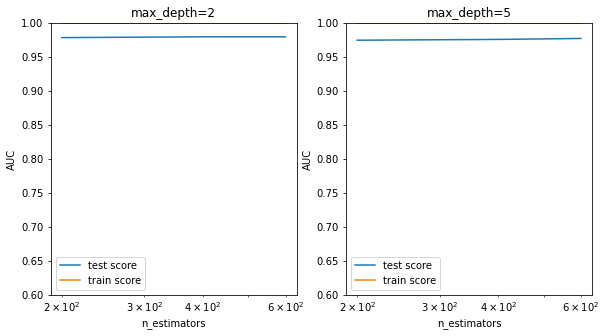

In [ ]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(15,5))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='bottom right')
    plt.xscale('log')

    


## it's clear from the above plot that the optimal value for max_depth is 2 and for n_estimator is 600

### creating the model with best found hyperparameters

In [ ]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=600,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.6, n_estimators=600)

In [ ]:
y_pred = ABC.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9995318516437859 



In [ ]:
confusion_adaboost_tuned = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.8992410764878057

In [ ]:
get_all_measures(confusion_adaboost_tuned)

Sensitivity is : 0.80

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.91

recall is : 0.80



## Gradient Boosting Classifier
Hyperparameters

learning_rate = step size towards the minima

subsample = the subsample size that we take from the training dataset

In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [ ]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=8)

grid_search_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  27 out of  27 | elapsed: 18.4min finished


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             n_jobs=8,
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,149.893034,2.329962,0.419642,0.058820,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.259180,0.086776,0.116750,0.154236,0.075209,9,0.267615,0.078286,0.097347,0.147750,0.085114
1,294.991822,2.113502,0.459399,0.091778,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.758660,0.203289,0.245805,0.402584,0.252381,8,0.758552,0.140855,0.174685,0.358031,0.283548
2,456.480070,8.893326,0.365888,0.042398,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.629491,0.108036,0.827510,0.521679,0.303456,7,0.640401,0.088712,0.853408,0.527507,0.322231
3,160.284730,1.437754,0.437666,0.072401,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.913364,0.784279,0.758472,0.818705,0.067758,4,0.917819,0.820898,0.730440,0.823052,0.076512
4,311.278873,8.610993,0.406420,0.061973,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.913469,0.896296,0.934995,0.914920,0.015832,1,0.920063,0.915658,0.915648,0.917123,0.002079


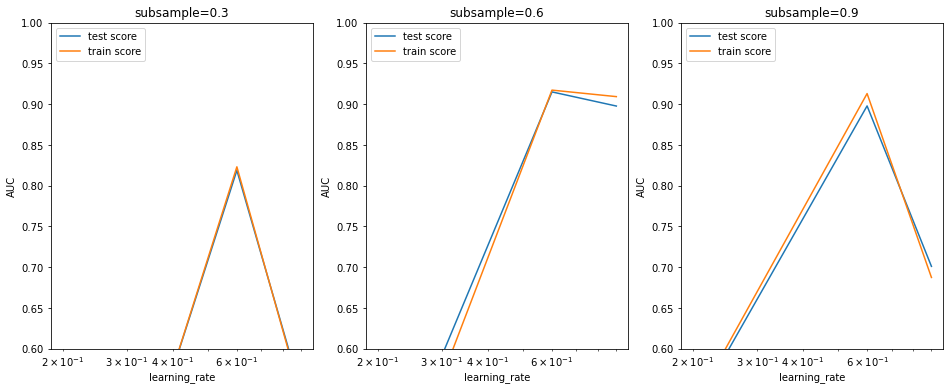

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

### it's clear from the above plot that best and optimal value for subsample is 0.6 and also for learning rate is 0.6

### building the best model with best hyper parameters

In [ ]:
GBC = GradientBoostingClassifier(max_depth=2, learning_rate=0.6, n_estimators=200,subsample=0.6)

In [ ]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=2, n_estimators=200,
                           subsample=0.6)

In [ ]:
y_pred = GBC.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9976007396744028 



In [ ]:
confusion_gradientboosting_tuned = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.5724360045252582

In [ ]:
get_all_measures(confusion_gradientboosting_tuned)

Sensitivity is : 0.15

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.20

recall is : 0.15



## XGBoost

In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9995669627705019 



In [ ]:
confusion_xgboost_default = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.8992586616881011

In [ ]:
get_all_measures(confusion_xgboost_default)

Sensitivity is : 0.80

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.93

recall is : 0.80



### Hyper parameter for xgboost

laerning_rate = the step size for gradient


subsample = random subsampling of the training dataset

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs=8)      

In [ ]:
# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:  5.0min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,98.063357,10.590310,0.886904,0.128465,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.976180,0.975856,0.972791,0.974942,0.001527,5,0.999964,0.999877,0.999835,0.999892,0.000054
1,129.893766,8.342425,0.733779,0.023720,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.984536,0.979402,0.986215,0.983384,0.002898,1,0.999985,0.999936,0.999952,0.999958,0.000020
2,148.067786,8.410087,0.796969,0.085351,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.983017,0.979170,0.979025,0.980404,0.001849,3,0.999979,0.999969,0.999927,0.999958,0.000022
3,90.544297,2.014910,0.740706,0.020337,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961784,0.957657,0.971973,0.963805,0.006017,6,0.999999,0.999995,0.999999,0.999998,0.000002
4,118.130124,2.981905,0.655726,0.088916,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.983689,0.977281,0.981615,0.980862,0.002670,2,1.000000,1.000000,1.000000,1.000000,0.000000
5,100.151413,10.403443,0.425361,0.079515,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.982728,0.970104,0.980737,0.977856,0.005542,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

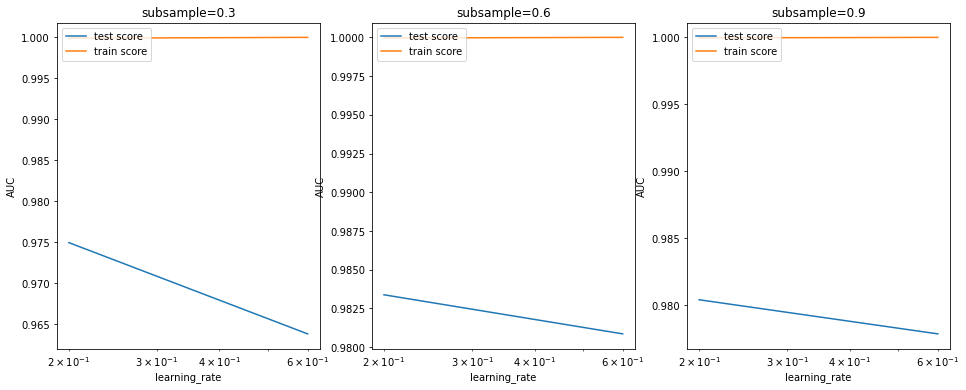

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.90, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

### it's clear from the above plots that the optimal values for learning_rate is 0.2 and subsample is 0.6

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

# fit model on training data
model = XGBClassifier(learning_rate= 0.2,
          max_depth= 2, 
          n_estimators=200,
          subsample=0.6,
         objective='binary:logistic',
          n_jobs= 8)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9995435553526912 



In [ ]:
confusion_xgboost_tuned = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.8992469382212375

In [ ]:
get_all_measures(confusion_xgboost_tuned)

Sensitivity is : 0.80

specificity is : 1.00

false_positive_rate is : 0.00

negative_predictive_value is : 1.00

precision is : 0.92

recall is : 0.80



# Final results with all the final Models with all the algorithms

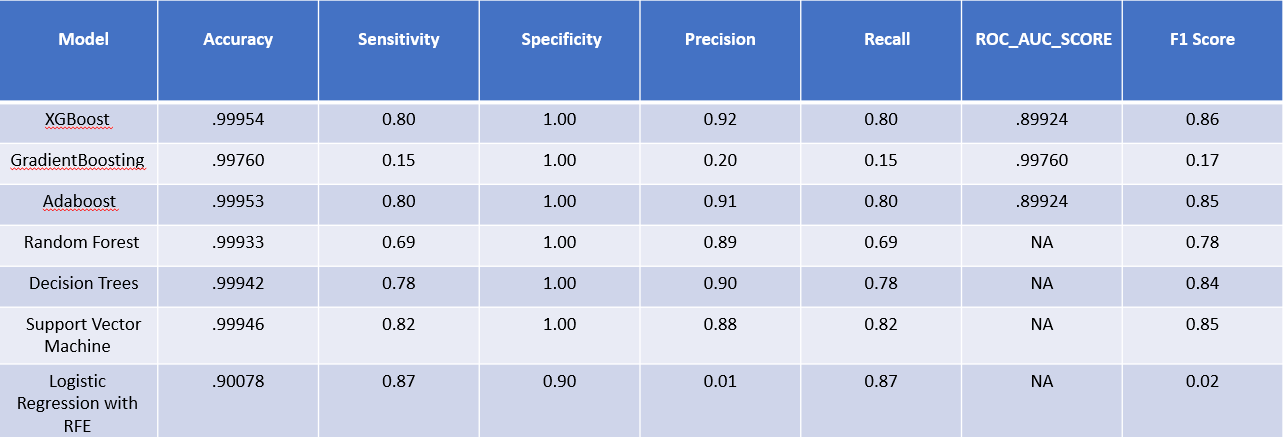

It can be concluded that XGBoost is the best algorithm for the current data